# Mushroom Classification: A Predictive Approach to Edibility Detection

### Problem Statement
The goal of this project is to develop a classification model that can accurately predict whether a mushroom is edible or poisonous based on its observable characteristics. The dataset contains categorical features describing physical properties of mushrooms from 23 species in the Agaricus and Lepiota families. Given the potential health risks associated with misidentifying poisonous mushrooms, the model must prioritize accuracy and reliability, especially in identifying poisonous samples. This project will involve data preprocessing, feature analysis, model training and evaluation, and uncertainty quantification to ensure the robustness and practical utility of the classification system.


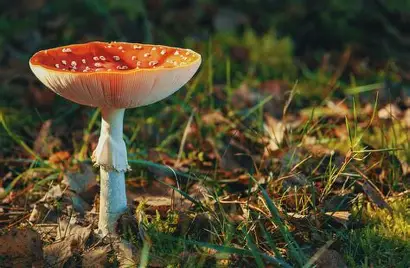

### Objective
The objective of this project is to build a machine learning model that accurately classifies mushrooms as edible or poisonous based on their physical characteristics. This involves:

Exploring and preprocessing the dataset to handle categorical features.

Analyzing feature importance to understand which characteristics contribute most to mushroom toxicity.

Training and evaluating classification models to identify the most effective algorithm.

Measuring the model’s certainty and performance using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Ensuring the model minimizes false negatives to avoid misclassifying poisonous mushrooms as edible.

### Information about Mushroom data
This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

### Link of the dataset
https://www.kaggle.com/datasets/uciml/mushroom-classification

### Importing required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

### Reading the csv file

In [2]:
mush=pd.read_csv("mushrooms.csv")
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Attribute Information


1. classes: edible=e, poisonous=p

2. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

3. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

4. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

5. bruises: bruises=t,no=f

6. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

7. gill-attachment: attached=a,descending=d,free=f,notched=n

8. gill-spacing: close=c,crowded=w,distant=d

9. gill-size: broad=b,narrow=n

10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

11. stalk-shape: enlarging=e,tapering=t

12. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

15. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

16. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

17. veil-type: partial=p,universal=u

18. veil-color: brown=n,orange=o,white=w,yellow=y

19. ring-number: none=n,one=o,two=t

20. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

21. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

22. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

23. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Shape of the data

In [3]:
mush.shape

(8124, 23)

### Information about data

In [4]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### checking duplicate values

In [5]:
mush.duplicated().sum()

0

### Checking null values

In [6]:
mush.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### Checking unique values

In [7]:
mush.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

### Checking count of unique values

In [8]:
for i in mush.columns:
    print(mush[i].value_counts())

class
e    4208
p    3916
Name: count, dtype: int64
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
bruises
f    4748
t    3376
Name: count, dtype: int64
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: coun

### Visual representation of categorical features

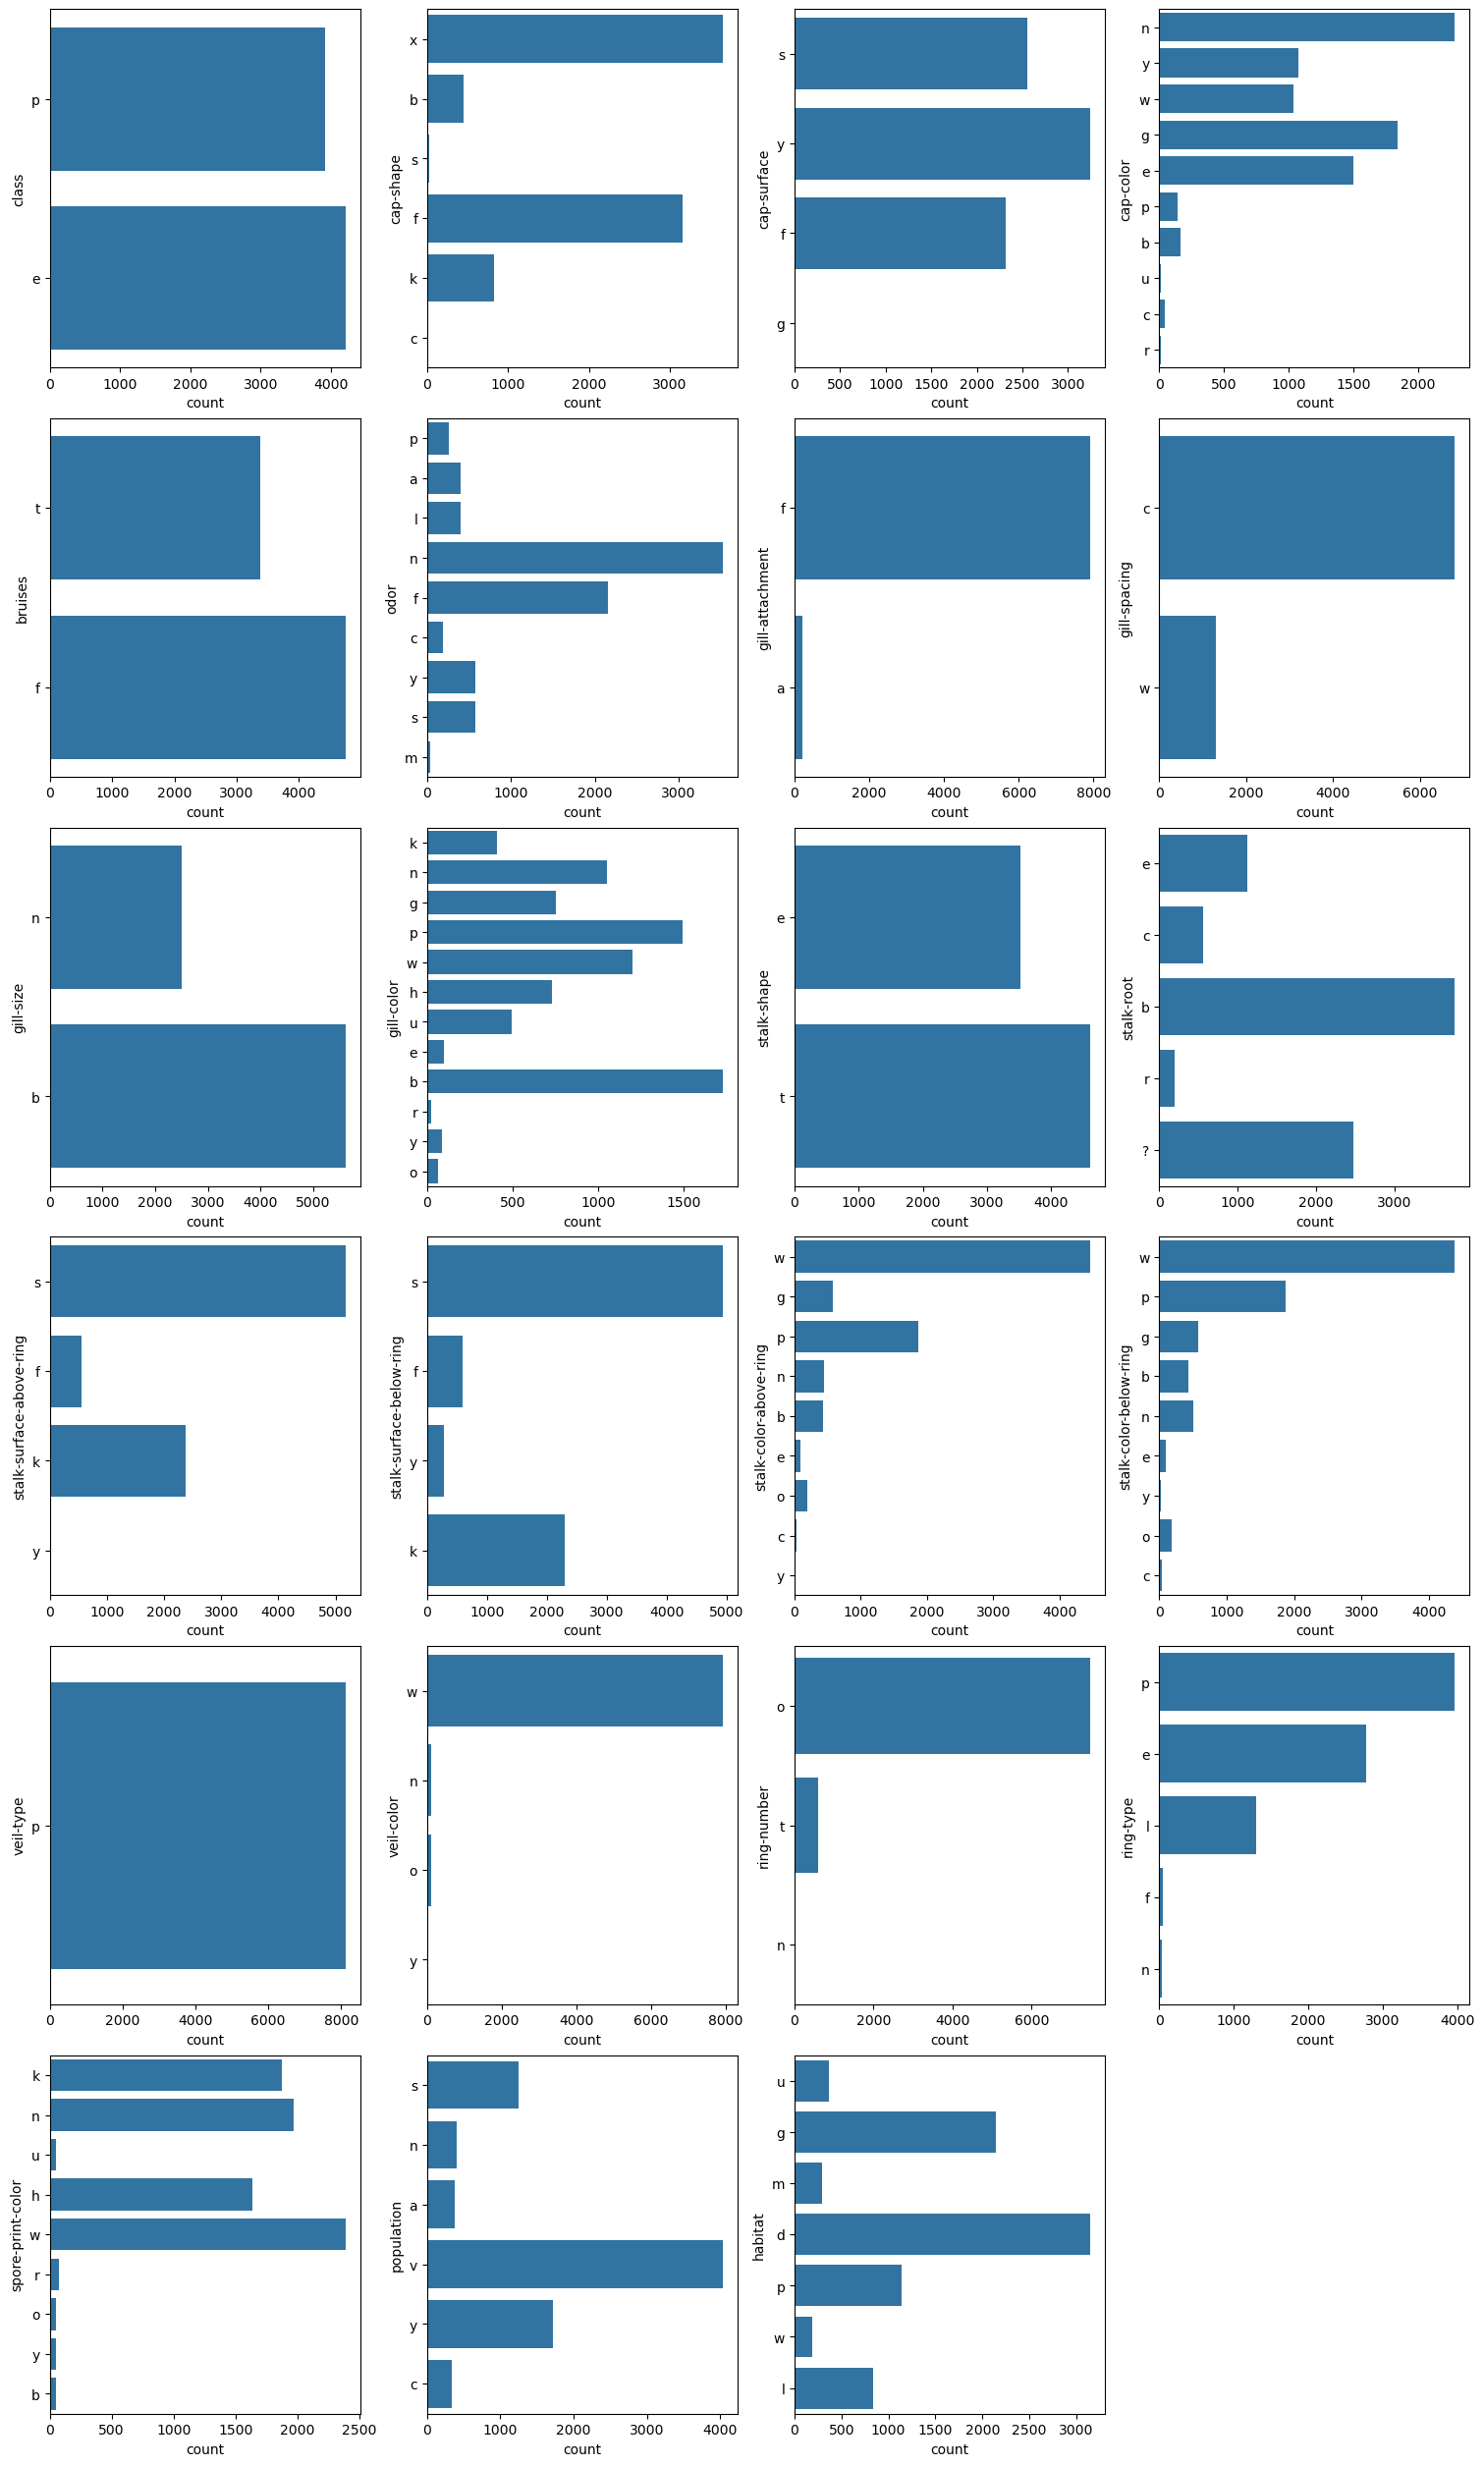

In [9]:
plt.figure(figsize=(15,25), layout="constrained")
plt.subplot(6,4,1)
sns.countplot(mush["class"])
plt.subplot(6,4,2)
sns.countplot(mush["cap-shape"])
plt.subplot(6,4,3)
sns.countplot(mush["cap-surface"])
plt.subplot(6,4,4)
sns.countplot(mush["cap-color"])
plt.subplot(6,4,5)
sns.countplot(mush["bruises"])
plt.subplot(6,4,6)
sns.countplot(mush["odor"])
plt.subplot(6,4,7)
sns.countplot(mush["gill-attachment"])
plt.subplot(6,4,8)
sns.countplot(mush["gill-spacing"])
plt.subplot(6,4,9)
sns.countplot(mush["gill-size"])
plt.subplot(6,4,10)
sns.countplot(mush["gill-color"])
plt.subplot(6,4,11)
sns.countplot(mush["stalk-shape"])
plt.subplot(6,4,12)
sns.countplot(mush["stalk-root"])
plt.subplot(6,4,13)
sns.countplot(mush["stalk-surface-above-ring"])
plt.subplot(6,4,14)
sns.countplot(mush["stalk-surface-below-ring"])
plt.subplot(6,4,15)
sns.countplot(mush["stalk-color-above-ring"])
plt.subplot(6,4,16)
sns.countplot(mush["stalk-color-below-ring"])
plt.subplot(6,4,17)
sns.countplot(mush["veil-type"])
plt.subplot(6,4,18)
sns.countplot(mush["veil-color"])
plt.subplot(6,4,19)
sns.countplot(mush["ring-number"])
plt.subplot(6,4,20)
sns.countplot(mush["ring-type"])
plt.subplot(6,4,21)
sns.countplot(mush["spore-print-color"])
plt.subplot(6,4,22)
sns.countplot(mush["population"])
plt.subplot(6,4,23)
sns.countplot(mush["habitat"])
plt.show()

### Label Encoding

In [10]:
label={}
for col in mush.columns:
    le=LabelEncoder()
    mush[col]=le.fit_transform(mush[col])
    label[col]=le

In [11]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Model Builidng

### Seperating the data into independent and dependent variable

In [12]:
x=mush.drop("class", axis=1)
y=mush["class"]

In [13]:
x.shape

(8124, 22)

In [14]:
y.shape

(8124,)

In [15]:
y.value_counts()

class
0    4208
1    3916
Name: count, dtype: int64

### Spliting the data into training and testing

In [16]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [17]:
score=[]

### Support Vector Machine
The SVC model shows excellent performance with an overall accuracy of 99%. It achieved near-perfect precision (1.00) and recall (0.99) for class 1 (poisonous), which is critical in minimizing the risk of misclassifying a poisonous mushroom as edible. The confusion matrix shows only 12 misclassifications out of 1625 samples, indicating strong generalization. The balanced precision, recall, and F1-scores across both classes confirm that the model is not biased toward either edible or poisonous classes. This makes SVC a highly reliable choice for mushroom classification.

In [18]:
svc=SVC()
svc.fit(x_train, y_train)
y_pred_svc=svc.predict(x_test)
svc_accuracy=accuracy_score(y_test, y_pred_svc)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))
score.append(svc_accuracy)

[[842   1]
 [ 11 771]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### KNN
The KNN model achieved 99.6% accuracy, with perfect recall (1.00) for class 1 (poisonous), meaning it identified all poisonous mushrooms correctly—crucial from a safety perspective. There were 6 false positives where edible mushrooms were misclassified as poisonous, which is a safer error to make. The high F1-scores (1.00) and near-perfect precision and recall for both classes show that the model is highly balanced and effective. KNN proves to be a strong and safe choice for mushroom classification with minimal risk of dangerous misclassification.

In [19]:
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn=knn.predict(x_test)
knn_accuracy=accuracy_score(y_test, y_pred_knn)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
score.append(knn_accuracy)

[[837   6]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Logistic Regression
The Logistic Regression model achieved a solid accuracy of 95%, but its performance is noticeably lower compared to SVC and KNN. It misclassified 44 edible mushrooms as poisonous and 41 poisonous mushrooms as edible—an important safety concern. The precision and recall are balanced at 0.94–0.95 for both classes, indicating reasonable reliability but also highlighting the model's limitations in handling potentially non-linear patterns. This suggests that while Logistic Regression provides a good baseline, it's less suitable for high-stakes classification like mushroom toxicity compared to more complex models.

In [20]:
log=LogisticRegression(max_iter=1000)
log.fit(x_train, y_train)
y_pred_log=log.predict(x_test)
log_accuracy=accuracy_score(y_test, y_pred_log)
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))
score.append(log_accuracy)

[[799  44]
 [ 41 741]]
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### DecisionTree
The Decision Tree classifier achieved perfect performance with 100% accuracy, precision, recall, and F1-score across both classes. The confusion matrix shows zero misclassifications, indicating that the model has perfectly fit the training and testing data. While this is impressive, it also raises a strong possibility of overfitting, especially with a model like Decision Tree, which can easily memorize patterns if not properly pruned. In real-world applications, such perfection may not generalize well, so cross-validation or testing on unseen data is crucial to confirm its robustness.

In [21]:
tree=DecisionTreeClassifier(max_depth=6)
tree.fit(x_train, y_train)
y_pred_dt=tree.predict(x_test)
dt_accuracy=accuracy_score(y_test, y_pred_dt)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
score.append(dt_accuracy)

[[843   0]
 [  1 781]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



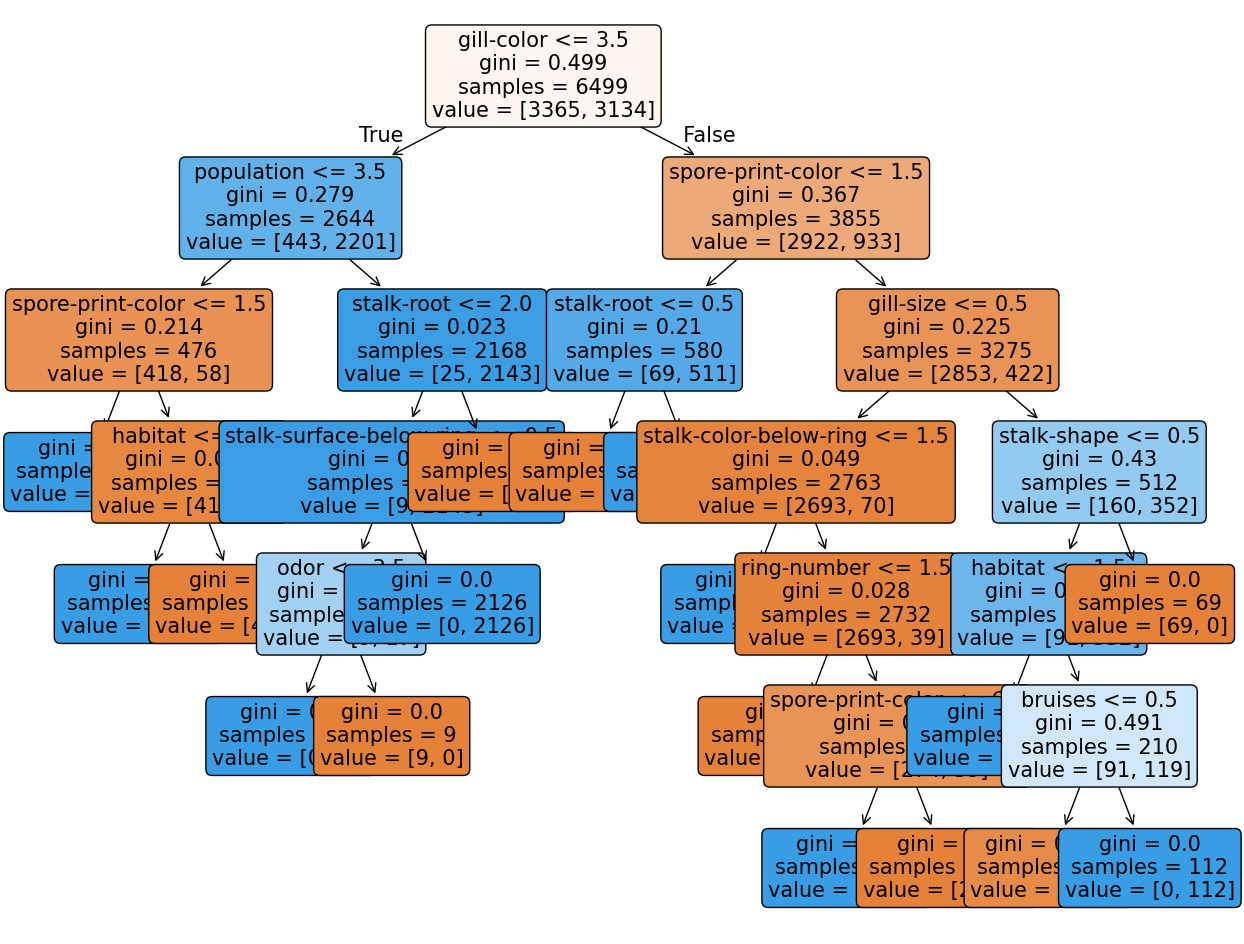

In [22]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,12))
plot_tree(tree, feature_names=x_train.columns,filled=True, rounded=True, fontsize=15)
plt.show()

### Creating a dataframe for accuracy
The Decision Tree classifier achieved perfect accuracy (100%), suggesting it may have overfit the training data, especially if the dataset has many categorical features. The K-Nearest Neighbors (KNN) and Support Vector Classifier (SVC) also performed exceptionally well with accuracies above 99%, indicating strong model performance and clear patterns in the data. The Logistic Regression model, while still good at 94.77%, lagged behind, likely due to its linear nature, which might not capture complex relationships. Overall, the dataset seems highly separable, and most models classify it with very high accuracy.

In [23]:
accu=pd.DataFrame(score, columns=["accuracy"],index=["svc","knn","log","tree"])
accu

,accuracy
svc,0.992615
knn,0.996308
log,0.947692
tree,0.999385


### Conclusion
In this project, various machine learning algorithms were applied to classify mushrooms as edible or poisonous based on their physical characteristics. Among the models tested, Decision Tree achieved perfect accuracy, while KNN and SVC also performed exceptionally well, with accuracies above 99% and very few misclassifications. Logistic Regression, while still effective, had comparatively lower performance at 95% accuracy and made more critical errors. The results indicate that the dataset is highly separable, and non-linear models like KNN, SVC, and Decision Tree are particularly well-suited for this classification task. However, the perfect performance of the Decision Tree suggests potential overfitting, emphasizing the need for further validation on unseen data. Overall, the study demonstrates that machine learning can reliably aid in identifying poisonous mushrooms, which is essential for safety in real-world applications.